# Machine Learning fo Reaserch

#### [Institute of Data Science at Maastricht University](https://www.maastrichtuniversity.nl/research/institute-data-science)
---

## Steps to choose a method based in a research question

- 1) Get to know your data  
- 2) Fit on train data  
- 3) Evaluate on test data  
- 4) Compare Methods  

![](../img/machinelearning.png)  
*This image is an extract from [SAP](https://blogs.sap.com/2016/05/11/go-for-the-intelligent-enterprise/) via [@JM_SAP](https://twitter.com/JM_SAP)*

---

In any case is easy to identify how to tackle a predictive probles, since is important to identify the method to respond the target variables.
    - Pattern: Anomaly Detection
    - Cicles: Time Series
    - Category: Classification
    - Quantity: Regression
    - Deep Features: Deep Learning

In [1]:
import turicreate as tc
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

***`turicreate` [documentation](https://apple.github.io/turicreate/docs/api/index.html)***

### Load Airbnb Amsterdam Dataset

The Dataset is from [Tom Slee Blog](http://tomslee.net/airbnb-data-collection-get-the-data) and it shows the most recent listings (2017-07-22) from Amsterdam Airbnb Rooms, itself is extracted from [Inside Airbnb](http://insideairbnb.com/) where is possible to make a very nice visual analysis following the hypothesis: Airbnb claims to be part of the "sharing economy" and disrupting the hotel industry. However, data shows that the majority of Airbnb listings in most cities are entire homes, many of which are rented all year round - disrupting housing and communities.

*** Copyright Tom Slee, licensed under a [Creative Commons](https://creativecommons.org/licenses/by-nc/2.5/ca/deed.en_US) Attribution-NonCommercial 2.5 Canada License. ***

In [2]:
df_rooms = pd.read_csv('https://s3.eu-west-3.amazonaws.com/pedrohserrano-datasets/airbnb_amsterdam.csv')

In [3]:
df_rooms.head()

,room_id,survey_id,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,last_modified,latitude,longitude
0,10176931,1476,49180562,Shared room,Amsterdam,De Pijp / Rivierenbuurt,7,4.5,2,1,156,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491
1,8935871,1476,46718394,Shared room,Amsterdam,Centrum West,45,4.5,4,1,126,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120
2,14011697,1476,10346595,Shared room,Amsterdam,Watergraafsmeer,1,0.0,3,1,132,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592
3,6137978,1476,8685430,Shared room,Amsterdam,Centrum West,7,5.0,4,1,121,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028
4,18630616,1476,70191803,Shared room,Amsterdam,De Baarsjes / Oud West,1,0.0,2,1,93,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873


---
## Get to know your data

Exploratory data analysis (EDA) is part of any Data Science pipeline, is not Machine Learning itself thought is necessary to develop a method.  
EDA is the step where we start delving deeper into the data set beyond the outliers and errors. The knowledge of the dataset might be splitted in two scopes:

**Extrinsic knowledge**
* Make sure your data is encoded properly
* Make sure your data falls within the expected range, and use domain knowledge whenever possible to define that expected range
* Deal with missing data in one way or another: replace it if you can or drop it
* Never tidy your data manually because that is not easily reproducible

In [4]:
df_rooms_cor = df_rooms[['room_type','reviews','overall_satisfaction','accommodates','bedrooms','price']]

In [5]:
df_rooms_cor.describe()

,reviews,overall_satisfaction,accommodates,bedrooms,price
count,18717.000000,18717.000000,18717.000000,18717.000000,18717.000000
mean,16.745899,3.301678,2.921729,1.430144,166.578672
std,33.527071,2.213334,1.327137,0.878731,108.932307
min,0.000000,0.000000,1.000000,0.000000,12.000000
25%,2.000000,0.000000,2.000000,1.000000,108.000000
50%,6.000000,4.500000,2.000000,1.000000,144.000000
75%,17.000000,5.000000,4.000000,2.000000,192.000000
max,532.000000,5.000000,17.000000,10.000000,6000.000000


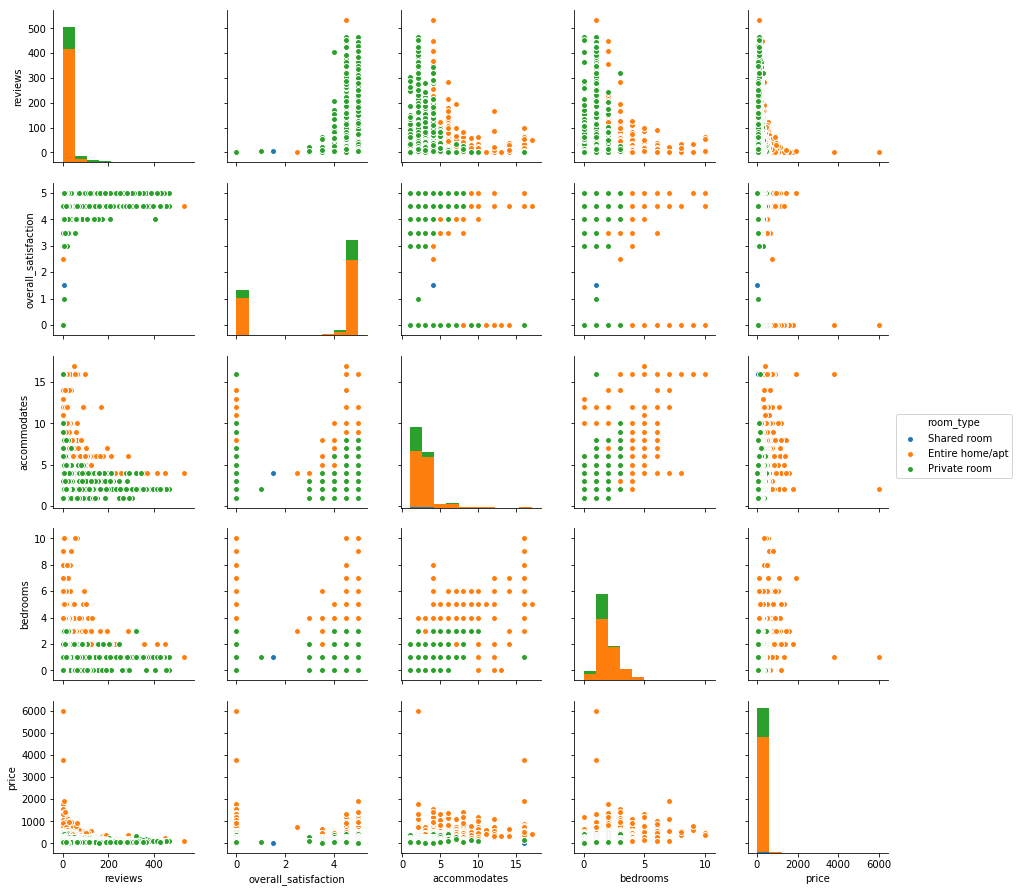

In [6]:
sb.pairplot(df_rooms_cor, hue='room_type')

**Intrinsic knowledge**
* How is my data distributed?
* Are there any correlations in my data?
* Are there any confounding factors that explain these correlations?
This is the stage where we plot all the data in as many ways as possible. Create many charts, but don't bother making them pretty — these charts are for internal use.

In [7]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table

In [8]:
missing = missing_values_table(df_rooms)
missing = missing[missing['Missing Values'] > 0] #showing only all those are not zero
print(missing)

      Missing Values  % of Total Values
name              52           0.277822


---
## Fit on train data

Assured that our data is now as clean as we can make it — and armed with some cursory knowledge of the distributions and relationships in our data set — it's time to splitting the data into training and testing sets.

A **training set** is a random subset of the data that we use to train our models.

A **testing set** is a random subset of the data (mutually exclusive from the training set) that we use to validate our models on unforseen data.

Especially in sparse data sets like ours, it's easy for models to **overfit** the data: The model will learn the training set so well that it won't be able to handle most of the cases it's never seen before. This is why it's important for us to build the model with the training set, but score it with the testing set.

Note that once we split the data into a training and testing set, we should treat the testing set like it no longer exists: We cannot use any information from the testing set to build our model or else we're cheating.

Let's set up our data first.

#### Split data into training and testing.
We use seed=0 so that everyone running this notebook gets the same results.  In practice, you may set a random seed (or let GraphLab Create pick a random seed for you).  

In [9]:
sf_rooms = tc.SFrame('https://s3.eu-west-3.amazonaws.com/pedrohserrano-datasets/airbnb_amsterdam.csv')
train_data, test_data = sf_rooms.random_split(.8,seed=0)

Downloading https://s3.eu-west-3.amazonaws.com/pedrohserrano-datasets/airbnb_amsterdam.csv to /var/tmp/turicreate-pedrohserrano/854/a9549591-4c6a-4dea-80a1-c33a5950f6fe.csv

Finished parsing file https://s3.eu-west-3.amazonaws.com/pedrohserrano-datasets/airbnb_amsterdam.csv

Parsing completed. Parsed 100 lines in 0.073137 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int,str,str,str,int,float,int,int,int,str,str,float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file https://s3.eu-west-3.amazonaws.com/pedrohserrano-datasets/airbnb_amsterdam.csv

Parsing completed. Parsed 18717 lines in 0.053548 secs.

### Target Feature 

In [10]:
# Let's compute the mean of the Prices This is the Target value
prices = sf_rooms['price'] # extract the price column of the sales SFrame -- this is now an SArray
avg_price = prices.mean() # if you just want the average, the .mean() function
print ("Average price house: %.2f" % avg_price)

Average price house: 166.58


### Learning Multiple Models

In [11]:
sf_rooms.column_names()

['room_id',
 'survey_id',
 'host_id',
 'room_type',
 'city',
 'neighborhood',
 'reviews',
 'overall_satisfaction',
 'accommodates',
 'bedrooms',
 'price',
 'name',
 'last_modified',
 'latitude',
 'longitude']

Now we will learn three (nested) models for predicting room prices. The first model will have the fewest features the second model will add one more feature and the third will add a few more:
* Model 1: room_type, neighborhood, reviews
* Model 2: Add overall_satisfaction
* Model 3: Add accommodates, bedrooms
* Model 4: Just numerical, accommodates, bedrooms
* Model 5: Add reviews

In [12]:
group_1_features = ['room_type', 'neighborhood', 'reviews']
group_2_features = group_1_features + ['overall_satisfaction']
group_3_features = group_2_features + ['accommodates', 'bedrooms']
group_4_features = ['accommodates', 'bedrooms']
group_5_features = group_4_features + ['reviews']

Now that you have the features, learn the weights for the three different models for predicting target = 'price'

In [13]:
model_1 = tc.decision_tree_regression.create(train_data, target = 'price', features = group_1_features, validation_set = None)
model_2 = tc.random_forest_regression.create(train_data, target = 'price', features = group_2_features, validation_set = None)
model_3 = tc.random_forest_regression.create(train_data, target = 'price', features = group_3_features, validation_set = None)
model_4 = tc.linear_regression.create(train_data, target = 'price', features = group_4_features, validation_set = None)
model_5 = tc.linear_regression.create(train_data, target = 'price', features = group_5_features, validation_set = None)

Decision tree regression:

--------------------------------------------------------

Number of examples          : 15045

Number of features          : 3

Number of unpacked features : 3

+-----------+--------------+--------------------+---------------+

| Iteration | Elapsed Time | Training-max_error | Training-rmse |

+-----------+--------------+--------------------+---------------+

| 1         | 0.012407     | 5813.055176        | 101.914009    |

+-----------+--------------+--------------------+---------------+

Random forest regression:

--------------------------------------------------------

Number of examples          : 15045

Number of features          : 4

Number of unpacked features : 4

+-----------+--------------+--------------------+---------------+

| Iteration | Elapsed Time | Training-max_error | Training-rmse |

+-----------+--------------+--------------------+---------------+

| 1         | 0.007892     | 5811.812988        | 101.849007    |

| 2         | 0.013611     | 5811.043945        | 101.967812    |

| 3         | 0.023945     | 5812.289551        | 101.845299    |

| 4         | 0.035764     | 5821.153320        | 102.019844    |

| 5         | 0.042262     | 5822.326172        | 101.935432    |

| 6         | 0.048727     | 5820.328613        | 101.936363    |

+-----------+--------------+--------------------+---------------+

Random forest regression:

--------------------------------------------------------

Number of examples          : 15045

Number of features          : 6

Number of unpacked features : 6

+-----------+--------------+--------------------+---------------+

| Iteration | Elapsed Time | Training-max_error | Training-rmse |

+-----------+--------------+--------------------+---------------+

| 1         | 0.011059     | 5862.704102        | 88.966248     |

| 2         | 0.021886     | 5862.593262        | 88.432899     |

| 3         | 0.030347     | 5860.242188        | 88.419098     |

| 4         | 0.037863     | 5858.683594        | 88.358818     |

| 5         | 0.045904     | 5857.426758        | 88.528236     |

| 6         | 0.054295     | 5855.762695        | 88.179611     |

+-----------+--------------+--------------------+---------------+

Linear regression:

--------------------------------------------------------

Number of examples          : 15045

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.006149     | 5870.036324        | 94.076960     |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 15045

Number of features          : 3

Number of unpacked features : 3

Number of coefficients    : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.008014     | 5867.438092        | 93.957868     |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [14]:
# To see the predictions
model_1.predict(train_data)

dtype: float
Rows: 15045
[95.82605743408203, 128.28172302246094, 95.82605743408203, 152.3651123046875, 95.82605743408203, 95.82605743408203, 95.82605743408203, 95.82605743408203, 95.82605743408203, 152.3651123046875, 95.82605743408203, 140.60922241210938, 95.82605743408203, 95.82605743408203, 95.82605743408203, 95.82605743408203, 95.82605743408203, 95.82605743408203, 95.82605743408203, 95.82605743408203, 95.82605743408203, 95.82605743408203, 95.82605743408203, 95.82605743408203, 95.82605743408203, 95.82605743408203, 95.82605743408203, 15.25, 95.82605743408203, 166.7367401123047, 216.85000610351562, 166.7367401123047, 235.1090087890625, 191.8614044189453, 186.94503784179688, 218.5495147705078, 186.94503784179688, 218.5495147705078, 251.3661346435547, 166.7367401123047, 166.7367401123047, 186.94503784179688, 186.94503784179688, 166.7367401123047, 218.5495147705078, 191.8614044189453, 218.5495147705078, 191.8614044189453, 166.7367401123047, 251.3661346435547, 186.94503784179688, 166.73674

---
## Evaluate on test data

Now that you've learned five models and extracted the model metrics we want to evaluate which model is best.

In [15]:
models = [model_1, model_2, model_3, model_4, model_5]

In [16]:
evaluation_train, evaluation_test = [], []
for model in models:
    rmse_train = tc.evaluation.rmse(train_data['price'], model.predict(train_data))
    rmse_test = tc.evaluation.rmse(test_data['price'], model.predict(test_data))
    evaluation_train.append(rmse_train)
    evaluation_test.append(rmse_test)

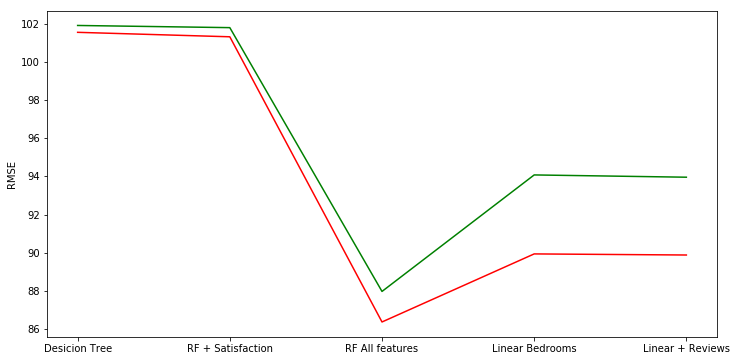

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(models)), evaluation_test, color='r')
plt.plot(range(len(models)), evaluation_train, color='g')
plt.xticks(range(len(models)), ['Desicion Tree', 'RF + Satisfaction', 'RF All features', 'Linear Bedrooms', 'Linear + Reviews'])
plt.ylabel('RMSE')
plt.show()

- The closest between metrics of Train and Test the better
- The lowest the error the better performance of the model

In this case, we might pick up the model 2

Choose the crime you want to predict

---
### Iterate over the chosen model

In [18]:
model_scores = []
for repetition in range(1000):
    train_data, test_data = sf_rooms.random_split(.8)
    model = tc.random_forest_regression.create(train_data, target = 'price', features = group_3_features, validation_set = None, verbose=False)
    rmse_test = tc.evaluation.rmse(test_data['price'], model.predict(test_data))
    model_scores.append(rmse_test)

/Users/pedrohserrano/anaconda3/envs/py35r/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


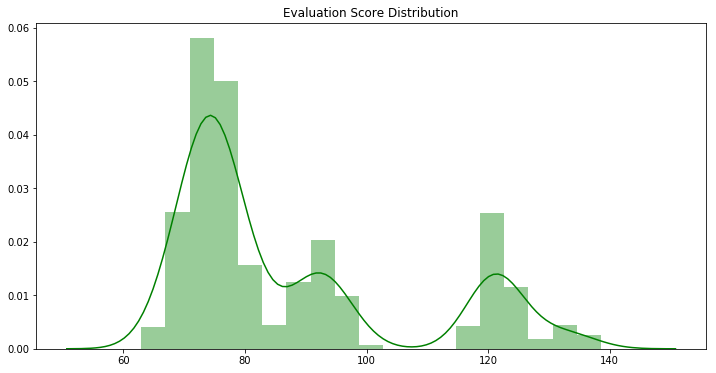

In [19]:
plt.figure(figsize=[12, 6])
plt.title('Evaluation Score Distribution')
sb.distplot(model_scores, color="g")

- Do we want to keep this model? 
- Shall we construct new features?
- What about more data exploration?
- Do we still having the same forst question?

---
### Documentation of the Method

The goal of construct a method is the reproducibility, that is why is important to document the procedures, taking into account versioning control of script for replicable science.

Notebooks like this one go a long way toward making our work reproducible. Since we documented every step as we moved along, we have a written record of what we did and why we did it — both in text and code.

Beyond recording what we did, we should also document what software and hardware we used to perform our analysis. This typically goes at the top of our notebooks so our readers know what tools to use.

[Sebastian Raschka](https://sebastianraschka.com/) created a handy notebook tool for this:

In [21]:
#!pip install watermark
#only install once

In [22]:
%load_ext watermark

In [23]:
%watermark -a 'Maastricht University' -nmv --packages turicreate,pandas,seaborn,matplotlib

Maastricht University Tue Apr 24 2018 

CPython 3.5.4
IPython 6.2.1

turicreate 4.2
pandas 0.22.0
seaborn 0.8.1
matplotlib 2.1.1

compiler   : GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.4.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
